In [6]:
#!pip install pyodbc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
import pyodbc


In [8]:
# Connnection to the database 
def connect_database():
    server = 'E6K-VDI1601\\TFTIC'   
    database = 'DataWarehouse_Demo'
    username = 'sa'
    password = 'tftic@2012'
    driver = '{ODBC Driver 17 for SQL Server}'    
    conn=pyodbc.connect(f'DRIVER={driver};SERVER={server};DATABASE={database};UID={username};PWD={password}' ,  autocommit=True)
    cursor = conn.cursor()
    return cursor , conn

In [9]:
# call the function connect_database and get cursor and connection
cur , con = connect_database()

In [10]:
sql=""" SELECT * FROM gold.fact_sales"""
df_sales_trend=pd.read_sql(sql , con)

C:\Users\b.azreg\AppData\Local\Temp\ipykernel_10756\464099942.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_sales_trend=pd.read_sql(sql , con)


In [11]:
df_sales_trend

,order_number,product_sk,customer_SK,order_date,shipping_date,due_date,sales_amount,quantity,price
0,SO43697,67,NaN,2010-12-29,2011-01-05,2011-01-10,3578,1,3578
1,SO43698,44,NaN,2010-12-29,2011-01-05,2011-01-10,3400,1,3400
2,SO43699,44,NaN,2010-12-29,2011-01-05,2011-01-10,3400,1,3400
3,SO43700,51,3502.0,2010-12-29,2011-01-05,2011-01-10,699,1,699
4,SO43700,126,3502.0,2010-12-29,2011-01-05,2011-01-10,699,1,699
...,...,...,...,...,...,...,...,...,...
18214,SO54180,8,8680.0,2013-03-10,2013-03-17,2013-03-22,35,1,35
18215,SO54180,176,8680.0,2013-03-10,2013-03-17,2013-03-22,35,1,35
18216,SO54180,239,8680.0,2013-03-10,2013-03-17,2013-03-22,35,1,35
18217,SO54181,115,8387.0,2013-03-10,2013-03-17,2013-03-22,1120,1,1120


In [19]:
top_products = df_sales_trend.groupby('order_number')['sales_amount'].sum().reset_index()
top_products = top_products.sort_values('sales_amount', ascending=False)

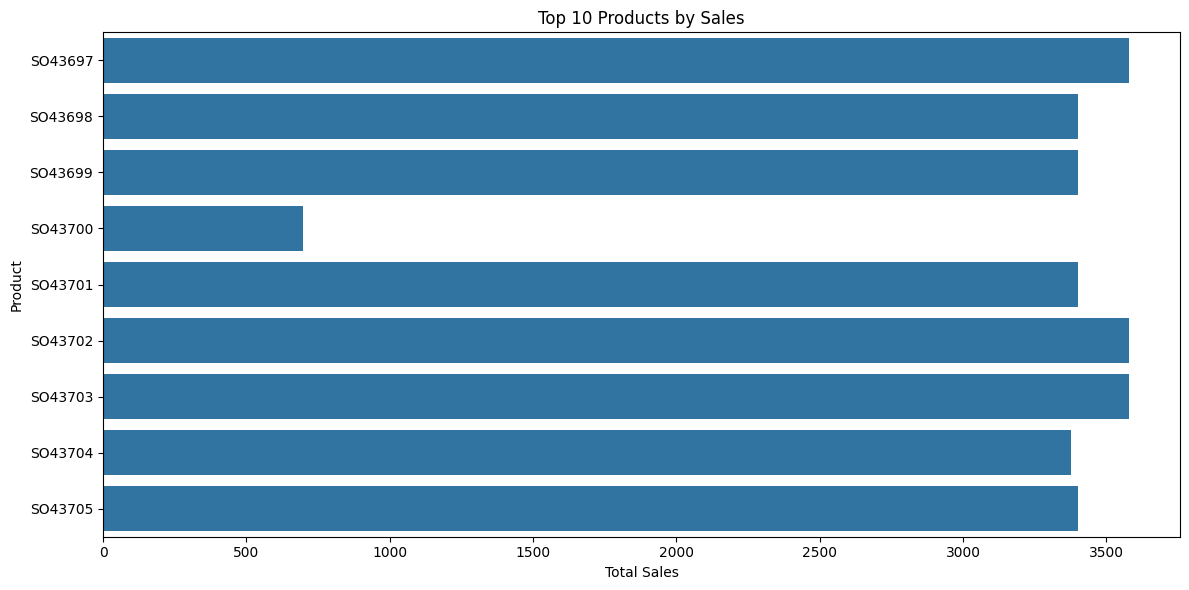

In [21]:
top_n = 10
top_products = df_sales_trend.head(top_n)

plt.figure(figsize=(12,6))
sns.barplot(x='sales_amount', y='order_number', data=top_products)
plt.title(f'Top {top_n} Products by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product')
plt.tight_layout()
plt.show()